In [1]:
import os
os.environ['FLYTE_PLATFORM_URL'] = "flyte-staging.lyft.net"
from flytekit.sdk.types import Types
from flytekit.common import utils
from flytekit.common.workflow_execution import SdkWorkflowExecution

from IPython.display import Image
from IPython.core.display import HTML 

In [2]:
wf = SdkWorkflowExecution.fetch(project="flytekubecondemo2019", domain="development", name="gt1785aotr")
print(wf.outputs)

{'predictions': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [3]:
wf = SdkWorkflowExecution.fetch(project="flytekubecondemo2019", domain="development", name="f1487e14d159749d0a9f")
print(wf.outputs["confusion_matrix_image"])

metadata {
  type {
  }
}
uri: "s3://lyft-modelbuilder/fg/50822df4ba23a48f29afdf81aa32d326"



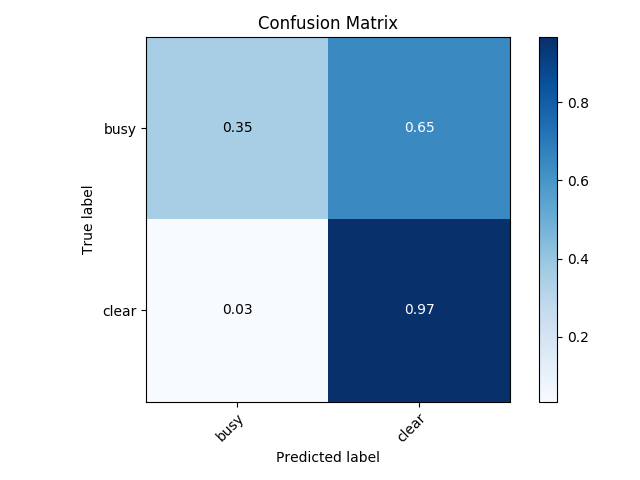

In [4]:
local_file = "/tmp/cm-4.png"
wf.outputs["confusion_matrix_image"].download(local_file, overwrite=True)
from IPython.display import Image
Image(filename=local_file)

In [6]:
from workflows.classifier_train_workflow import train_lp
from flytekit.common.launch_plan import SdkLaunchPlan

PROJECT="flytekubecondemo2019"
dataprep_wf_exec = SdkWorkflowExecution.fetch(project=PROJECT, domain="development", name="u86fgpn177-prepare-0")
frames_mpblobs = dataprep_wf_exec.outputs["selected_frames_mpblobs"]
streams_names = dataprep_wf_exec.outputs["streams_names_out"]

DEFAULT_TRAINING_VALIDATION_CONFIG_FILE = "models/classifier/resnet50/configs/model_training_config_demo.json"

train_lp = SdkLaunchPlan.fetch(
    project=PROJECT, 
    domain="development", 
    name="workflows.classifier_train_workflow.ClassifierTrainWorkflow",
    version="7181d257f1b6caa4c90886e9f10a0e97df30d6c3")

train_lp.execute(
    project=PROJECT,
    domain="development",
    inputs={
        "available_streams_mpblobs": frames_mpblobs,
        "available_streams_names": streams_names,
        "streams_metadata_path": "s3://lyft-modelbuilder/metadata/_FlyteKubeconDemo2019Dataset/metadata/streams_metadata.json",
    }
)

id {
  project: "flytekubecondemo2019"
  domain: "development"
  name: "ff0ddb4a25f0f4867b0a"
}
spec {
  launch_plan {
    resource_type: LAUNCH_PLAN
    project: "flytekubecondemo2019"
    domain: "development"
    name: "workflows.classifier_train_workflow.ClassifierTrainWorkflow"
    version: "7181d257f1b6caa4c90886e9f10a0e97df30d6c3"
  }
  inputs {
    literals {
      key: "available_streams_mpblobs"
      value {
        collection {
          literals {
            scalar {
              blob {
                metadata {
                  type {
                    dimensionality: MULTIPART
                  }
                }
                uri: "s3://lyft-modelbuilder/re/0d98b28f3762b0562ed31208442008b3/"
              }
            }
          }
          literals {
            scalar {
              blob {
                metadata {
                  type {
                    dimensionality: MULTIPART
                  }
                }
                uri: "s3://lyft-m

In [7]:
PROJECT="flytekubecondemo2019"
eval_wf_exec = SdkWorkflowExecution.fetch(project=PROJECT, domain="development", name="fpn6gaba")

ground_truths_out = eval_wf_exec.get_node_executions()["evaluate-on-datasets-task"].outputs["ground_truths_out"]
predictions_out = eval_wf_exec.get_node_executions()["evaluate-on-datasets-task"].outputs["predictions_out"]



In [16]:
from utils.metric_utils.metric_utils import calculate_cutoff_youdens_j, calculate_precision_recall_curve, calculate_roc_curve
from models.classifier.resnet50.constants import DEFAULT_CLASS_LABELS, DEFAULT_POSITIVE_LABEL
def generate_predictions(ground_truths, probabilities):
    pos_label_idx = DEFAULT_CLASS_LABELS.index(DEFAULT_POSITIVE_LABEL)
    tpr, fpr, roc_thresholds = calculate_roc_curve(
        ground_truths,
        probabilities,
        pos_label_idx=pos_label_idx,
    )
    print(roc_thresholds)
    
    threshold_val = float(calculate_cutoff_youdens_j(tpr, fpr, roc_thresholds))
    predictions = [1 if p[pos_label_idx] > threshold_val else 0 for p in probabilities]
    thresholds = [float(v) for v in roc_thresholds]
    import matplotlib.pyplot as plt
    plt.plot(tpr, fpr)
    plt.show()
    # return threshold_val, thresholds, predictions
#    predictions.set([1 if p[pos_label_idx] > threshold_val else 0 for p in probabilities])
#    threshold.set(threshold_val)
#    thresholds.set([float(v) for v in roc_thresholds])
    


[1.81406313 0.81406313 0.32724977 0.32392183 0.31182399 0.30942369
 0.30902892 0.30895054 0.30622208 0.30446637 0.29852659 0.29847246
 0.29752138 0.29143077 0.2767795  0.27592584 0.27556041 0.27324086
 0.27259293 0.27193809 0.2678737  0.26563588 0.25908366 0.25754127
 0.25351432 0.25182992 0.25070176 0.25067076 0.25048938 0.25013775
 0.24897243 0.24895521 0.24870458 0.24862535 0.24576283 0.24501079
 0.24080953 0.23801741 0.23728962 0.2366365  0.23537724 0.23522349
 0.23367734 0.23353928 0.23086931 0.23069616 0.23000947 0.22998807
 0.22979045 0.22939682 0.22462454 0.22459045 0.22429462 0.22374541
 0.21926491 0.21639353 0.21598092 0.21575613 0.21538888 0.21405977
 0.21058373 0.21029967 0.20928591 0.2089895  0.20690091 0.20673332
 0.20630893 0.2063029  0.20281944 0.20256777 0.20200832 0.20141463
 0.20079656 0.20018271 0.19792704 0.19781929 0.19575569 0.193378
 0.19334251 0.19311714 0.19282733 0.19137573 0.18874244 0.18838297
 0.18662407 0.18659994 0.18551014 0.18508621 0.18476287 0.184584

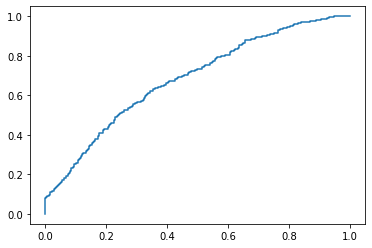

In [17]:
generate_predictions(ground_truths=ground_truths_out, probabilities=predictions_out)
